<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Downloading-Libraries" data-toc-modified-id="Downloading-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Downloading Libraries</a></span></li><li><span><a href="#Retrieving-Data" data-toc-modified-id="Retrieving-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Retrieving Data</a></span><ul class="toc-item"><li><span><a href="#Data-Observation" data-toc-modified-id="Data-Observation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data Observation</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Missing Values</a></span></li><li><span><a href="#Duplicated-Values" data-toc-modified-id="Duplicated-Values-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Duplicated Values</a></span></li><li><span><a href="#Data-Types-Optimization" data-toc-modified-id="Data-Types-Optimization-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Data Types Optimization</a></span></li></ul></li></ul></li><li><span><a href="#Data-Analysis" data-toc-modified-id="Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Proportions-of-the-various-types-of-establishments" data-toc-modified-id="Proportions-of-the-various-types-of-establishments-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Proportions of the various types of establishments</a></span></li><li><span><a href="#Proportions-of-chain-and-nonchain-establishments" data-toc-modified-id="Proportions-of-chain-and-nonchain-establishments-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Proportions of chain and nonchain establishments</a></span></li><li><span><a href="#Chain-characteristics" data-toc-modified-id="Chain-characteristics-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Chain characteristics</a></span></li><li><span><a href="#Average-number-of-seats" data-toc-modified-id="Average-number-of-seats-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Average number of seats</a></span></li><li><span><a href="#Street-names" data-toc-modified-id="Street-names-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Street names</a></span></li><li><span><a href="#Top-ten-streets" data-toc-modified-id="Top-ten-streets-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Top ten streets</a></span></li><li><span><a href="#Streets-with-one-establishment" data-toc-modified-id="Streets-with-one-establishment-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Streets with one establishment</a></span></li><li><span><a href="#Establishment-seats-distribution" data-toc-modified-id="Establishment-seats-distribution-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Establishment seats distribution</a></span></li></ul></li><li><span><a href="#Overall-Conclusion" data-toc-modified-id="Overall-Conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Overall Conclusion</a></span></li><li><span><a href="#Presentation:" data-toc-modified-id="Presentation:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Presentation:</a></span></li></ul></div>

# Market Research on Restaurants in Los Angeles

The aim of the project is to prepare a market research using the open-source data on restaurants in LA in order to attract investors to the openning of small robot-run cafe. The main question is will you be able to maintain your success when the novelty of robot waiters wears off?

## Downloading Libraries

In [48]:
# Importing Pandas
import pandas as pd

# Importing NumPy
import numpy as np

# Impoting Matplotlib
import matplotlib.pyplot as plt

# Importing Seaborn
import seaborn as sns

# Importing Plotly
import plotly.graph_objects as go
import plotly.express as px

import sys

# Disabling warnings
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [49]:
# Importing Sidetable
!python -m pip install sidetable

In [50]:
# Importing Sidetable
import sidetable as stb

In [51]:
# Styling Pandas
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 120)
pd.set_option('display.width', 500)

# Styling Matplotlib 
plt.rcParams["figure.figsize"] = (10, 6)

## Retrieving Data

In [52]:
# Downloading dataset from pandas library
rest_data = pd.read_csv('/datasets/rest_data_us.csv')

In [53]:
# Displaying the dataset sample
rest_data.sample(3)

,id,object_name,address,chain,object_type,number
8838,20624,BRIAN'S SHAVE ICE,11301 W OLYMPIC BLVD # 103,False,Restaurant,10
1514,13300,PIZZA WORLD,365 S FAIRFAX AVE,False,Pizza,43
2822,14608,YOSHINOYA #2129,3081 N SAN FERNANDO RD,True,Restaurant,32


In [54]:
# Changing names of some columns to more informative (less confusing)
rest_data.rename(columns={'object_name' : 'name', 'object_type' : 'type', 'number' : 'seats'}, inplace=True)

In [55]:
# Displaying the dataset sample with new column names
rest_data.sample()

,id,name,address,chain,type,seats
3130,14916,OENO VINO WINES,3111 GLENDALE BLVD UNIT 2,False,Restaurant,21


### Data Observation

**Data description:**

___rest_data table:___
- name — establishment name
- chain — chain establishment (TRUE/FALSE)
- type — establishment type
- address — address
- seats — number of seats

In [56]:
rest_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       9651 non-null   int64 
 1   name     9651 non-null   object
 2   address  9651 non-null   object
 3   chain    9648 non-null   object
 4   type     9651 non-null   object
 5   seats    9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 2.4 MB


In [57]:
# Getting more detailed information about 'visits' data
rest_data.describe()

,id,seats
count,9651.000000,9651.000000
mean,16611.000000,43.695161
std,2786.148058,47.622874
min,11786.000000,1.000000
25%,14198.500000,14.000000
50%,16611.000000,27.000000
75%,19023.500000,46.000000
max,21436.000000,229.000000


In [58]:
# Describing data with object type
rest_data.describe(include='object')

,name,address,chain,type
count,9651,9651,9648,9651
unique,8672,8517,2,6
top,THE COFFEE BEAN & TEA LEAF,3607 TROUSDALE PKWY,False,Restaurant
freq,47,11,5972,7255


In [59]:
# looking at the total breakdown by object type
rest_data.stb.freq(['type'], value='seats')

,type,seats,percent,cumulative_seats,cumulative_percent
0,Restaurant,348547,82.652442,348547,82.652442
1,Fast Food,33939,8.048100,382486,90.700542
2,Bar,13072,3.099819,395558,93.800361
3,Cafe,10875,2.578835,406433,96.379197
4,Pizza,9107,2.159582,415540,98.538779
5,Bakery,6162,1.461221,421702,100.000000


In [60]:
# Verifying volume of missing data
rest_data.stb.missing(style=True)

,missing,total,percent
chain,3,"9,651",0.03%
id,0,"9,651",0.00%
name,0,"9,651",0.00%
address,0,"9,651",0.00%
type,0,"9,651",0.00%
seats,0,"9,651",0.00%


***Data observation conclusion:*** 
- We needed to optimize data by changing some columns data types.
- There are 3 missing values in __'chain'___ column.
- We found out that there are almost 83% of restaurants (vast majority of all establishments).
- THE COFFEE BEAN & TEA LEAF is the largest chain of restaurants in LA.
- There are more single (unique) establishments than chains in the dataset.
- We have total 9,651 entries in the dataset.


### Data Preprocessing

#### Missing Values

In [61]:
# Calling rows with missing values
rest_data[rest_data['chain'].isna()]

,id,name,address,chain,type,seats
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


- We observe 3 missing values.
- We need to find other object with the same name to see whether the object is a part of some chain.
- We may use str.contains() atribute for this.

In [62]:
# Calling all rows with name that contains 'TAQUERIA LOS'
rest_data[rest_data['name'].str.contains('TAQUERIA LOS',case=False)]

,id,name,address,chain,type,seats
3297,15083,TAQUERIA LOS ANAYA,4651 W ADAMS BLVD,False,Restaurant,5
6051,17837,TAQUERIA LOS AMIGOS,1378 W SUNSET BLVD,False,Restaurant,5
6340,18126,TAQUERIA LOS FELIX,2300 VENICE BLVD,False,Restaurant,35
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14


- TAQUERIA LOS 3 CARNALES is a single restaurant

In [63]:
rest_data[rest_data['name'].str.contains('JAMMIN',case=False)]

,id,name,address,chain,type,seats
6790,18576,WI JAMMIN CAFE,1359 S REDONDO BLVD,False,Restaurant,28
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1


- JAMMIN JIMMY'S PIZZA is a single pizzeria

In [64]:
rest_data[rest_data['name'].str.contains('THE LEXINGTON',case=False)]

,id,name,address,chain,type,seats
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


- THE LEXINGTON THEATER	is a unique restaurant

- None of the above three objects are part of any chain, therefore we can fill their missing values in __chain__ column to __False__

In [65]:
# Filling in missing values
rest_data['chain'] = rest_data['chain'].fillna(False)

In [66]:
# Validating result of filling missing values
rest_data.stb.missing(style=True)

,missing,total,percent
id,0,"9,651",0.00%
name,0,"9,651",0.00%
address,0,"9,651",0.00%
chain,0,"9,651",0.00%
type,0,"9,651",0.00%
seats,0,"9,651",0.00%


- All NaN values have been replaced with __Flase__
- No more missing values in the dataset

#### Duplicated Values

In [67]:
# Checking for duplicates, printing the result
print('Number of duplicated rows in rest_data:', rest_data.duplicated().sum())

Number of duplicated rows in rest_data: 0


#### Data Types Optimization

The following conversions are to be done:

- id into int32
- seats into int32
- chain into bool
- type into category

In [68]:
# Changing columns data type
rest_data['id'] = rest_data['id'].astype('int32')
rest_data['seats'] = rest_data['seats'].astype('int32')
rest_data['chain'] = rest_data['chain'].astype('bool')
rest_data['type'] = rest_data['type'].astype('category')

In [69]:
# Validating the result of data type conversion and optimized memory usage
rest_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   id       9651 non-null   int32   
 1   name     9651 non-null   object  
 2   address  9651 non-null   object  
 3   chain    9651 non-null   bool    
 4   type     9651 non-null   category
 5   seats    9651 non-null   int32   
dtypes: bool(1), category(1), int32(2), object(2)
memory usage: 1.5 MB


- The memory usage has lowered from initial 2.4 MB down to 1.5 MB

## Data Analysis

### Proportions of the various types of establishments

***Task:***
- Investigate the proportions of the various types of establishments. 
- Plot a graph.

In [70]:
# Displaying the numbers of each establishment type
rest_types = rest_data['type'].value_counts().reset_index()
rest_types.columns = ['type', 'count']
rest_types

,type,count
0,Restaurant,7255
1,Fast Food,1066
2,Cafe,435
3,Pizza,320
4,Bar,292
5,Bakery,283


In [71]:
# Visualizing types of establishments using pie chart
fig = px.pie(rest_types, values='count', names='type', color='type',
             title="Proportions of the various types of establishments",
             color_discrete_map={'Restaurant':'DarkKhaki',
                                 'Fast Food':'DarkOliveGreen',
                                 'Cafe':'DarkSlateGrey',
                                 'Pizza':'CadetBlue',
                                 'Bar' : 'lightblue', 
                                 'Bakery': 'DarkCyan'})
fig.show()

***Graph observations and conclusions:***
- The share of Restaurants in LA is over 75% of all establishments. This could be explained by popular dining-out culture in USA in general and that restaurants may offer wide variety of foods and comfortable conditions, thus having big success.
- The second type is Fast Food with 11% share and there are cafes, pizzerias, bars, and bakeries, each of them occupying around 3-4% of the market.
- We can observe that our target type, which is Cafe, is not very popular in LA (only ~4.5%). We have to find out the reason (is it not profitable or this segment of business is still under the development?) 

### Proportions of chain and nonchain establishments

***Task:***
- Investigate the proportions of chain and nonchain establishments. 
- Plot a graph.
- Which type of establishment is typically a chain?

In [72]:
# Counting the total number of chain/non-chaain establishments
chain_types = rest_data['chain'].value_counts().reset_index()
chain_types.columns = ['chain', 'count']
chain_types

,chain,count
0,False,5975
1,True,3676


In [73]:
# Displaying persentage of all chain/non_chain establishments
chain_types.stb.freq(['chain'], value='count')

,chain,count,percent,cumulative_count,cumulative_percent
0,False,5975,61.910683,5975,61.910683
1,True,3676,38.089317,9651,100.000000


- Among ALL types of establishments we observe ~62% of individual (uniqie) establishments and ~38% of chain oriented.

In [74]:
# Breaking down chain/non-chain establishemnt by types, adding persentage column
chain_types_prop = rest_data.groupby(['type', 'chain']).size().reset_index()
chain_types_prop['persentage'] = rest_data.groupby(
    ['type', 'chain']).size().groupby(level=0).apply(
    lambda x: 100 * x / float(x.sum())).values.round(1)
chain_types_prop.columns = ['type', 'chain', 'count', 'persentage']
chain_types_prop

,type,chain,count,persentage
0,Bakery,False,0,0.0
1,Bakery,True,283,100.0
2,Bar,False,215,73.6
3,Bar,True,77,26.4
4,Cafe,False,169,38.9
5,Cafe,True,266,61.1
6,Fast Food,False,461,43.2
7,Fast Food,True,605,56.8
8,Pizza,False,167,52.2
9,Pizza,True,153,47.8


In [75]:
# Visualizing the proportions of chain/non-chain establishments via interactive histogram
fig = px.histogram(
    chain_types_prop, x='type', y='persentage', color='chain', barmode='group', title="Proportions of chain and nonchain establishments by types")
fig.show()

***Graph observations and conclusions:***
- In general non-chain establishments ~62% significantly outnumber chains establishments ~38%.
- The non-chain prevailing observed only among __Bar__ and __Restaurant__ types.
- __Bakeries__ are 100% a chain and __Fast Food__ stores are part of a chain more often than not.
- Our focus type __Cafe__ shows proportion of ~61% of chain and ~39% on non-chain establishments

### Chain characteristics

- What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?

In [76]:
# Grouping data of only chain establishments by name, aggregating number of branches and number of seats
chain_seats = (rest_data.query('chain == True')
                   .groupby('name')
                   .agg({'address': 'count', 'seats': 'mean'})
                   .rename(columns={'address'  : 'branch'})
).sort_values(by='branch', ascending=False)
chain_seats.head(3)

,branch,seats
name,,
THE COFFEE BEAN & TEA LEAF,47,26.723404
SUBWAY,31,16.419355
DOMINO'S PIZZA,15,12.333333


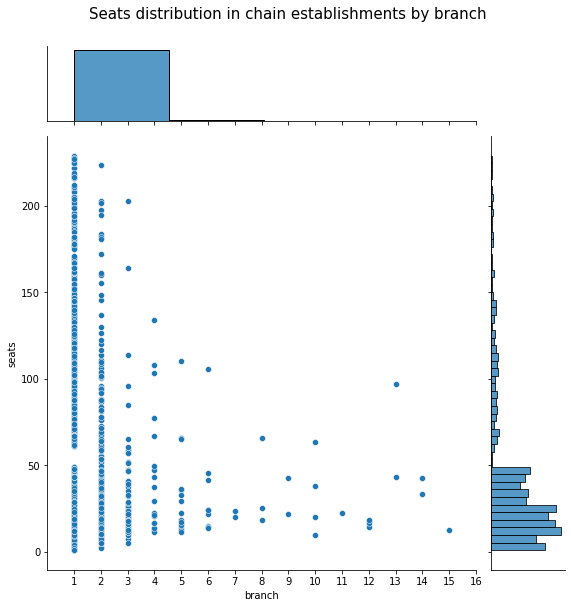

In [77]:
# Visualizing via 'jointplot' the distribution of seats and branches data
sns.jointplot(data=chain_seats, x='branch', y='seats', xlim=(0,16), height=8).ax_joint.set_xticks(list(range(1,17,1)))
sns.despine()
plt.suptitle('Seats distribution in chain establishments by branch', fontsize=15, y=1.05)
plt.show()

In [78]:
# Displaying info about establishments with less than 3 seats
min_seats = chain_seats.query('seats <= 3').groupby('name')['branch'].sum().sort_values(ascending=False)
print('Number of establishments with 3 or less seats:', min_seats.value_counts().sum())

Number of establishments with 3 or less seats: 133


***Conclusions:***
- The majority of establishments are of a single branch (at least in LA).
- For most of chain branches, there are more establishments with less than 50 seats.
- There are 133 establishments with 3 or less seats (might be drive-ins or take-aways) - new trend since 2020.
- __"A few establishments with lots of seats"__ looks like a main characteristic of chain establishments.

### Average number of seats

***Task:***
- Determine the average number of seats for each type of establishment.
- On average, which type of restaurant has the greatest number of seats? 
- Plot graphs.

In [79]:
# Determine the average number of seats for each type of restaurant
type_seats = rest_data.groupby('type')['seats'].mean().sort_values(ascending=False)
type_seats.to_frame()

,seats
type,
Restaurant,48.042316
Bar,44.767123
Fast Food,31.837711
Pizza,28.459375
Cafe,25.000000
Bakery,21.773852


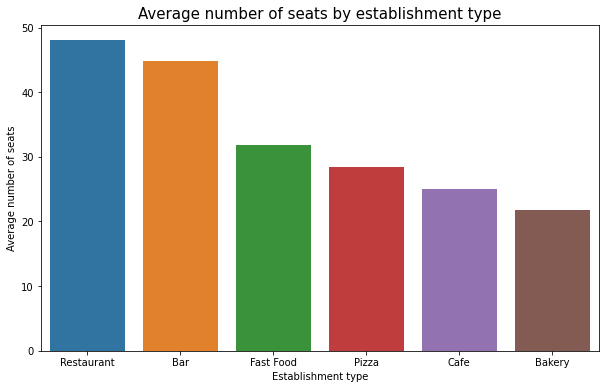

In [80]:
# Building graph on the AVG number of seats by establishment type
ax = sns.barplot(data=rest_data, x='type', y='seats', ci=False, order=type_seats.index)
plt.title('Average number of seats by establishment type', fontsize=15)
plt.ylabel('Average number of seats')
plt.xlabel('Establishment type')
plt.show()

***Graph observations and conclusions:***
- __Restaurants__ and __Bars__ have bigger number of seats in average than rest of the establishment types.
- __Restaurants__ host parties (families, business meetings) more frequently and in peek times have lots of parties simultaneously.
- __Bars__ tend to accommodate large number of customers at 'high hours' to be profitable.
- Establishments like __Fast Food__, __Pizza__, __Cafe__ and __Bakery__ require less seats as people spend less time in them.


### Street names

- Put the data on street names from the address column in a separate column.
- We are going to identify the paterns of dining establishments alocation, for this we need to extract street name from the full address information and continue analysis including new parameter - location/area.
- For this purpose it is decided to use Regex pattern matcher (credit to source: http://w3schools.com/) that can find any string between a number and a pound sign and/or a number (or other components) using Metacharachters.

In [81]:
# Displaying data sample to see the initial 'address' format 
rest_data.sample(3)

,id,name,address,chain,type,seats
8195,19981,FATBURGER # 109,1611 N VERMONT AVE,True,Fast Food,9
5595,17381,DAILY DONUTS,1100 N VERMONT AVE STE 18,True,Fast Food,16
9273,21059,TRAY DTLA,100 S MAIN ST # 120,False,Restaurant,208


In [82]:
# Importing Regex library
import re

# Extracting street names and adding respective column to the dataset
rest_data['street_name'] = (rest_data['address']
                            .replace('(^[0-9]+)','', regex=True)
                            .replace('[0-9 #]+$','', regex=True)
                           )


In [83]:
# Displaaying the sample of 5 random rows of the dataset
rest_data.sample(5)

,id,name,address,chain,type,seats,street_name
6096,17882,THE BRIKS,1111 S HOPE ST # #110,False,Restaurant,134,S HOPE ST
9306,21092,MAXIMO'S PIZZA,4157 LONG BEACH AVE,False,Pizza,27,LONG BEACH AVE
3596,15382,THE POST COFFEE SHOP,216 W 9TH ST,False,Cafe,14,W 9TH ST
3932,15718,CHUNJU HAN-IL KWAN,3450 W 6TH ST STE #106,False,Restaurant,33,W 6TH ST STE
9039,20825,85 CELSIUS BAKERY CAFE,700 WILSHIRE BLVD,True,Bakery,37,WILSHIRE BLVD


- We have extracted the street names from the address column and placed them into new column.

### Top ten streets

***Task:***
- Plot a graph of the top ten streets by number of establishments.

In [84]:
# Grouping data by the street_name and count estbalishment names
top_street_count = (rest_data.groupby('street_name')['name'].count()
                        .sort_values(ascending=False)
                        .rename('count')).reset_index()
                        
# Displaying result of top 10 rows (street names with max number of establishments)                   
top_street_count.head(10)

,street_name,count
0,W SUNSET BLVD,305
1,W PICO BLVD,305
2,WILSHIRE BLVD,223
3,HOLLYWOOD BLVD,194
4,SANTA MONICA BLVD,191
5,S WESTERN AVE,183
6,S FIGUEROA ST,173
7,W 3RD ST,173
8,S VERMONT AVE,165
9,W OLYMPIC BLVD,155


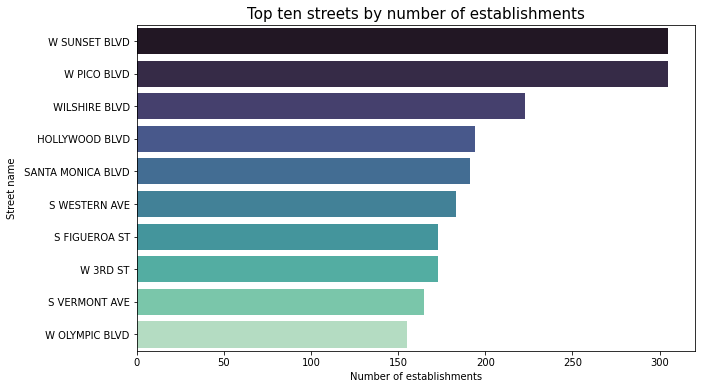

In [85]:
# Visualizing the table data in horizontal barplot
ax = sns.barplot(x='count', y='street_name', data=top_street_count.head(10), palette='mako')
ax.set_title("Top ten streets by number of establishments", fontsize=15)
ax.set_xlabel('Number of establishments')
ax.set_ylabel('Street name')
plt.show()

***Graph observations and conclusions:***
- Wilshire boulevard (25 km long), western Sunset boulevard (35 km long) and a major LA street - western Pico boulevard have the most establishments.

- All three of them are streets of LA neighborhood Beverly Hills, California.

- The highest number of establishments on these streets is related to their actual length, wealthy neighborhood specifics and numerous other businesses and business centers in this area.


### Streets with one establishment

- Find the number of streets that only have one establishment.

In [86]:
# Calculating and displaying the number of streets with only one establishment on them
print('There are {} streets that have a single establishment.'.format(
    top_street_count.query('count == 1').count()[0]))

There are 1213 streets that have a single establishment.


***Possible explanation:***
- The street is very short.
- There are no many potetntial customers for dining establishment (area with 1-2 floor private houses).

### Establishment seats distribution

- For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?

In [87]:
# Creating variable for top 10 streets (with most establishments)
top_10_streets = top_street_count.head(10).reset_index()
top_10_streets

,index,street_name,count
0,0,W SUNSET BLVD,305
1,1,W PICO BLVD,305
2,2,WILSHIRE BLVD,223
3,3,HOLLYWOOD BLVD,194
4,4,SANTA MONICA BLVD,191
5,5,S WESTERN AVE,183
6,6,S FIGUEROA ST,173
7,7,W 3RD ST,173
8,8,S VERMONT AVE,165
9,9,W OLYMPIC BLVD,155


In [88]:
# Merging tables to add number of seats to the streets with largest number of establishments
top_streets_seats = rest_data.merge(top_10_streets, on='street_name')
top_streets_seats.head(5)

,id,name,address,chain,type,seats,street_name,index,count
0,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD BLVD,3,194
1,11841,RALPHS MARKET #206,5429 HOLLYWOOD BLVD,False,Restaurant,22,HOLLYWOOD BLVD,3,194
2,11874,BOLT,5648 HOLLYWOOD BLVD,False,Restaurant,45,HOLLYWOOD BLVD,3,194
3,11886,SHAKE SHACK,6201 HOLLYWOOD BLVD,True,Restaurant,3,HOLLYWOOD BLVD,3,194
4,11891,GREENLEAF CHOP SHOP,6201 HOLLYWOOD BLVD # 120,False,Restaurant,131,HOLLYWOOD BLVD,3,194


In [89]:
# Getting details of the 'seats' column data
top_streets_seats.seats.describe()

count    2067.000000
mean       46.812288
std        48.987439
min         1.000000
25%        14.500000
50%        29.000000
75%        48.000000
max       229.000000
Name: seats, dtype: float64

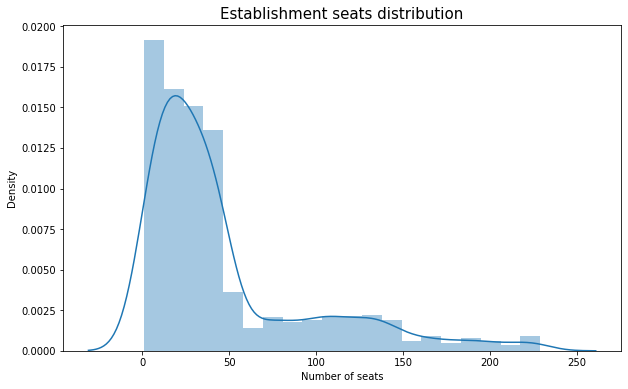

In [90]:
# Visualizing seats distribution in the establishments from top streets
sns.distplot(top_streets_seats['seats'], bins=20)
plt.title('Establishment seats distribution', fontsize=15)
plt.xlabel('Number of seats')
plt.show();

***Graph observation and conclusion:***
- Data of seats distribution at top 10 streets repeat the trend of seats distribution in the chain establishments we observed earlier in our study - ___there are approximately 50 seats or less___.
- Another trend from chain characteristic is ___large number of locations with relative few seats___.
- We've calculated median of 29 seats, which means that half of our data is within that range (around this value).
- We've calculated an average of ~47 seats, which is explained by availability of certain number of establishments with over 100 and few even with over 200 seats.

## Overall Conclusion

The research was intended to examine current market of food establishments to understand the popularity of types and locations in Los Angeles. We assessed an idea to open a small robot-run cafe and to estimate its potential business profitability.

- We've learned that 75% of food establishments in LA are __restaurants__ and majority 68% of them are __non-chains__.

- Our focus type of establishments' __Cafe__ share only 4.5% of the market, but they are mostly represented by __chains__ 61%.

- The average seats number in restaurants is 49 and in cafe is 25.
      
- The establishments that belong to chains prefer no more than 50 seats, though represented by many places.
       
- In general the number of establishments (mostly restaurants and bars) with over 100 seats is insignificant.

- Geographically wise the most popular streets for food establishment locations are the longest main boulevards of Los Angeles:   Wilshire with over 200 of establishments and West Sunset, West Pico (the longest and busiest streets of the megapolis with over 300 establishments on each. The traffic is high and many customers are attracted to the center of LA.
- There are approx. 1200 of other streets with only a single establishment.


***Recommendations:***
- Bearing in mind the novelty of robot-waiters idea, we might prefer to start from single store as a pilot.
- If customers will appreciate this unique experience, we should definitely strive for developing the chain.
- It would be reasonable to maximize the seating places at least to 30-35.
- The most preferable location for cafe is downtown, on Hollywood Blvd, not inside of Beverly Hills, but close to it.

 The main question is will you be able to maintain your success when the novelty of robot waiters wears off?

- To answer this question and for the final decision, it would be necessary to check business metrics of other similar establishments to analyze the trends of the most successful businesses. We will have to consider if the revenue from attracted customers will cover the expenses on robots staff maintenance, insurance etc.


## Presentation: 

https://drive.google.com/file/d/1E3z6M8x-klTLrZmX7PpoP6-g7GqAc4nY/view?usp=sharing